# Dados dos Acidentes em Rodovias Federais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.stats import linregress

In [2]:
file = 'dataset/demostrativo_acidentes.csv'
df_acidentes = pd.read_csv(file, sep=';', encoding='cp1252',
                           dtype={'No_DaOcorrencia':'object','Automovel':'object','Caminhao':'object',
                                  'Moto':'object', 'Transp__Cargas_Especiais':'object',
                                  'Utilitario':'object', 'Ilesos':'object'}) #low_memory=False

In [3]:
df_acidentes.head()

Concessionaria      Data Horario No_DaOcorrencia TipoDeOcorrencia   Km  \
0             AF  01/01/10    0:38               3       sem vítima  314   
1             AF  01/01/10   23:31             170       sem vítima  297   
2             AF  01/01/10    6:39              14       sem vítima  230   
3             AF  01/01/10    7:14              21       sem vítima  301   
4             AF  01/01/10    8:56              41       com vítima  174   

      Trecho Sentido    TipoDeAcidente Automovel  ...  Outros Tracao_animal  \
0  BR-101/RJ     Sul    Saida de Pista         1  ...     NaN           NaN   
1  BR-101/RJ     Sul  Colisão Traseira       NaN  ...     1.0           NaN   
2  BR-101/RJ   Norte    Saida de Pista         1  ...     NaN           NaN   
3  BR-101/RJ   Norte    Saida de Pista         1  ...     NaN           NaN   
4  BR-101/RJ   Norte   Colisão Lateral       NaN  ...     1.0           NaN   

  Transp__Cargas_Especiais  Trator__maquinas  Utilitario  Ilesos  \
0                      NaN               NaN         NaN       1   
1                      NaN               NaN         NaN       2   
2                      NaN               NaN         NaN       2   
3                      NaN               NaN         NaN       2   
4                      NaN               NaN         NaN       1   

  Levemente_feridos  Moderadamente_feridos Gravemente_feridos Mortos  
0               NaN                    NaN                NaN    NaN  
1               NaN                    NaN                NaN    NaN  
2               NaN                    NaN                NaN    NaN  
3               NaN                    NaN                NaN    NaN  
4               1.0                    1.0                NaN    NaN  

[5 rows x 24 columns]

In [4]:
df_acidentes.columns

Index(['Concessionaria', 'Data', 'Horario', 'No_DaOcorrencia',
       'TipoDeOcorrencia', 'Km', 'Trecho', 'Sentido', 'TipoDeAcidente',
       'Automovel', 'Bicicleta', 'Caminhao', 'Moto', 'Onibus', 'Outros',
       'Tracao_animal', 'Transp__Cargas_Especiais', 'Trator__maquinas',
       'Utilitario', 'Ilesos', 'Levemente_feridos', 'Moderadamente_feridos',
       'Gravemente_feridos', 'Mortos'],
      dtype='object')

## Correção dos dados

<p style='text-align: justify'>Alguns colunas do dataset utilizado apresentam dados misturados, onde podem ser encontrados informações do tipo *int*, *str*, *NaN* e *float*, isso ocorre devido à falhas na criação do arquivo de dataset, pois no dicionário de dados o qual se foi obtido o dataset mostra que essas colunas devem possuir dados com valores númericos.</p>

Desta forma torna-se necessário realizar a padronização dessas informações, sendo utilizado para tal, o método presente no Pandas *.to_numeric()*.

In [5]:
df_acidentes['Automovel'] = pd.to_numeric(df_acidentes['Automovel'], errors='coerce');
df_acidentes['Caminhao'] = pd.to_numeric(df_acidentes['Caminhao'], errors='coerce');
df_acidentes['Moto'] = pd.to_numeric(df_acidentes['Moto'], errors='coerce');
df_acidentes['Transp__Cargas_Especiais'] = pd.to_numeric(df_acidentes['Transp__Cargas_Especiais'], errors='coerce');
df_acidentes['Utilitario'] = pd.to_numeric(df_acidentes['Utilitario'], errors='coerce');
df_acidentes['Ilesos'] = pd.to_numeric(df_acidentes['Ilesos'], errors='coerce');

In [6]:
df_acidentes['Automovel'] = df_acidentes['Automovel'].fillna(0)
df_acidentes['Bicicleta'] = df_acidentes['Bicicleta'].fillna(0)
df_acidentes['Caminhao'] = df_acidentes['Caminhao'].fillna(0)
df_acidentes['Moto'] = df_acidentes['Moto'].fillna(0)
df_acidentes['Onibus'] = df_acidentes['Onibus'].fillna(0)
df_acidentes['Tracao_animal'] = df_acidentes['Tracao_animal'].fillna(0)
df_acidentes['Transp__Cargas_Especiais'] = df_acidentes['Transp__Cargas_Especiais'].fillna(0)
df_acidentes['Trator__maquinas'] = df_acidentes['Trator__maquinas'].fillna(0)
df_acidentes['Utilitario'] = df_acidentes['Utilitario'].fillna(0)
df_acidentes['Outros'] = df_acidentes['Outros'].fillna(0)
df_acidentes['Ilesos'] = df_acidentes['Ilesos'].fillna(0)
df_acidentes['Levemente_feridos'] = df_acidentes['Levemente_feridos'].fillna(0)
df_acidentes['Moderadamente_feridos'] = df_acidentes['Moderadamente_feridos'].fillna(0)
df_acidentes['Gravemente_feridos'] = df_acidentes['Gravemente_feridos'].fillna(0)
df_acidentes['Mortos'] = df_acidentes['Mortos'].fillna(0)

Há campos como "Colisão Lateral" que representam o mesmo tipo de acidente porém por algum motivo apresentam como grafia diferente, fazendo com gerem resultados errôneos, necessitanto então promover a pradonização do mesmos.

## Medidas de Centralidade e Dispersão e Boxplots

### Automovel

Automóveis envolvidos em acidentes

In [7]:
df_acidentes['Automovel'] = df_acidentes['Automovel'].fillna(0)
print(f"Média:\t\t{df_acidentes['Automovel'].mean()}")
print(f"Mediana:\t{df_acidentes['Automovel'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Automovel'].std()}")

Média:		0.9561700349807213
Mediana:	1.0
Desvio Padrão:	0.8424357395670825


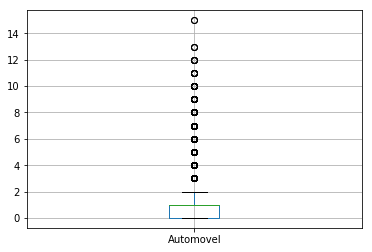

In [8]:
df_acidentes.boxplot(column='Automovel')

### Bicicleta

Biciletas envolvidas em acidentes

In [9]:
df_acidentes['Bicicleta'] = df_acidentes['Bicicleta'].fillna(0)
print(f"Média:\t\t{df_acidentes['Bicicleta'].mean()}")
print(f"Mediana:\t{df_acidentes['Bicicleta'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Bicicleta'].std()}")

Média:		0.010440257583909793
Mediana:	0.0
Desvio Padrão:	0.10485322119345608


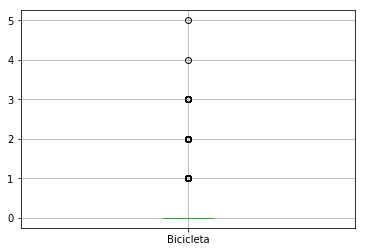

In [10]:
df_acidentes.boxplot(column='Bicicleta')

### Caminhao

Caminhões envolvidos em acidentes

In [11]:
df_acidentes['Caminhao'] = df_acidentes['Caminhao'].fillna(0)
print(f"Média:\t\t{df_acidentes['Caminhao'].mean()}")
print(f"Mediana:\t{df_acidentes['Caminhao'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Caminhao'].std()}")

Média:		0.3264769680702636
Mediana:	0.0
Desvio Padrão:	0.6014587548738797


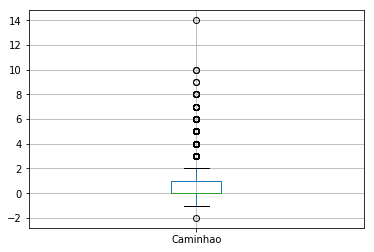

In [12]:
df_acidentes.boxplot(column='Caminhao')

Provável erros no dados, pois não há como -2 caminhões estarem envolvidos em acidentes.

### Moto

Motos envolvidas em acidentes

In [13]:
df_acidentes['Moto'] = df_acidentes['Moto'].fillna(0)
print(f"Média:\t\t{df_acidentes['Moto'].mean()}")
print(f"Mediana:\t{df_acidentes['Moto'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Moto'].std()}")

Média:		0.16127669611789536
Mediana:	0.0
Desvio Padrão:	0.38449255835684204


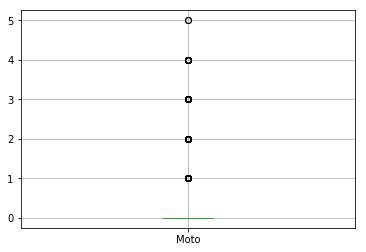

In [14]:
df_acidentes.boxplot(column='Moto')

### Onibus

Ônibus envolvidos em acidentes

In [15]:
df_acidentes['Onibus'] = df_acidentes['Onibus'].fillna(0)
print(f"Média:\t\t{df_acidentes['Onibus'].mean()}")
print(f"Mediana:\t{df_acidentes['Onibus'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Onibus'].std()}")

Média:		0.03649156778073609
Mediana:	0.0
Desvio Padrão:	0.1974654655498219


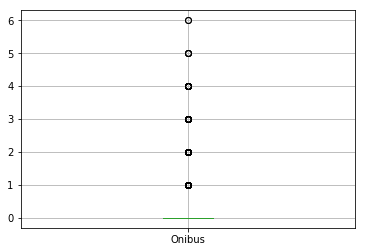

In [16]:
df_acidentes.boxplot(column='Onibus')

### Tracao_animal

Veículos com tração animal envolvidos em acidentes

In [17]:
df_acidentes['Tracao_animal'] = df_acidentes['Tracao_animal'].fillna(0)
print(f"Média:\t\t{df_acidentes['Tracao_animal'].mean()}")
print(f"Mediana:\t{df_acidentes['Tracao_animal'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Tracao_animal'].std()}")

Média:		0.001911683314242195
Mediana:	0.0
Desvio Padrão:	0.04403254900753537


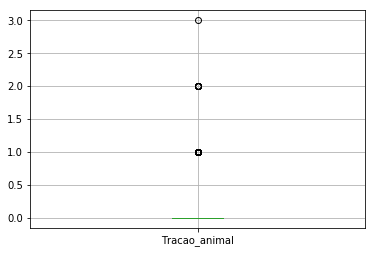

In [18]:
df_acidentes.boxplot(column='Tracao_animal')

### Transp__Cargas_Especiais

Transportes de cargas especiais envolvidos em acidentes

In [19]:
df_acidentes['Transp__Cargas_Especiais'] = df_acidentes['Transp__Cargas_Especiais'].fillna(0)
print(f"Média:\t\t{df_acidentes['Transp__Cargas_Especiais'].mean()}")
print(f"Mediana:\t{df_acidentes['Transp__Cargas_Especiais'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Transp__Cargas_Especiais'].std()}")

Média:		0.005150753187809011
Mediana:	0.0
Desvio Padrão:	0.11134580691547674


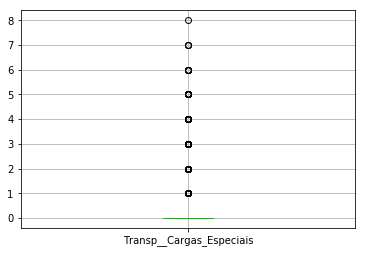

In [20]:
df_acidentes.boxplot(column='Transp__Cargas_Especiais')

### Trator__maquinas

Tratores envolvidos em acidentes

In [21]:
df_acidentes['Trator__maquinas'] = df_acidentes['Trator__maquinas'].fillna(0)
print(f"Média:\t\t{df_acidentes['Trator__maquinas'].mean()}")
print(f"Mediana:\t{df_acidentes['Trator__maquinas'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Trator__maquinas'].std()}")

Média:		0.00035304474109795373
Mediana:	0.0
Desvio Padrão:	0.01919211997900671


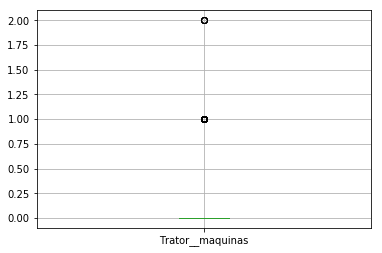

In [22]:
df_acidentes.boxplot(column='Trator__maquinas')

### Utilitario

Utilitários envolvidos em acidentes

In [23]:
df_acidentes['Utilitario'] = df_acidentes['Utilitario'].fillna(0)
print(f"Média:\t\t{df_acidentes['Utilitario'].mean()}")
print(f"Mediana:\t{df_acidentes['Utilitario'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Utilitario'].std()}")

Média:		0.06731746122289148
Mediana:	0.0
Desvio Padrão:	0.2651823171729908


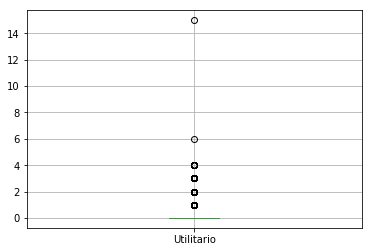

In [24]:
df_acidentes.boxplot(column='Utilitario')

### Outros

Outros veículos envolvidos em acidentes

In [25]:
df_acidentes['Outros'] = df_acidentes['Outros'].fillna(0)
print(f"Média:\t\t{df_acidentes['Outros'].mean()}")
print(f"Mediana:\t{df_acidentes['Outros'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Outros'].std()}")

Média:		0.08470452930194267
Mediana:	0.0
Desvio Padrão:	0.3037620109749596


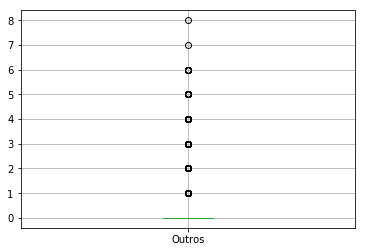

In [26]:
df_acidentes.boxplot(column='Outros')

### Ilesos

Envolvidos em acidentes que saíram ilesas

In [27]:
df_acidentes['Ilesos'] = df_acidentes['Ilesos'].fillna(0)
print(f"Média:\t\t{df_acidentes['Ilesos'].mean()}")
print(f"Mediana:\t{df_acidentes['Ilesos'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Ilesos'].std()}")

Média:		2.111793390200773
Mediana:	1.0
Desvio Padrão:	3.9159074861781433


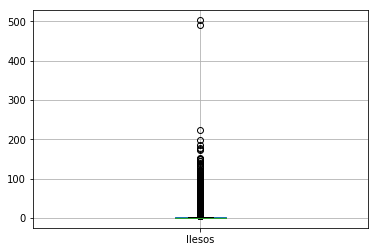

In [28]:
df_acidentes.boxplot(column='Ilesos')

### Levemente_feridos

Vítimas envolvidas em acidentes que saíram levemente feridas

In [29]:
df_acidentes['Levemente_feridos'] = df_acidentes['Levemente_feridos'].fillna(0)
print(f"Média:\t\t{df_acidentes['Levemente_feridos'].mean()}")
print(f"Mediana:\t{df_acidentes['Levemente_feridos'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Levemente_feridos'].std()}")

Média:		0.358269494930185
Mediana:	0.0
Desvio Padrão:	0.8141680863673639


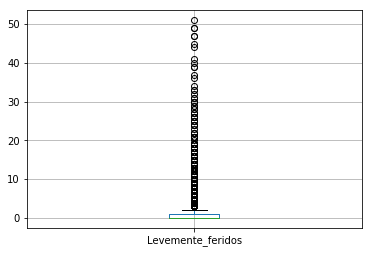

In [30]:
df_acidentes.boxplot(column='Levemente_feridos')

### Moderadamente_feridos

Vítimas envolvidas em acidentes que saíram moderadamente feridas

In [31]:
df_acidentes['Moderadamente_feridos'] = df_acidentes['Moderadamente_feridos'].fillna(0)
print(f"Média:\t\t{df_acidentes['Moderadamente_feridos'].mean()}")
print(f"Mediana:\t{df_acidentes['Moderadamente_feridos'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Moderadamente_feridos'].std()}")

Média:		0.10071796041890531
Mediana:	0.0
Desvio Padrão:	0.38708689800748686


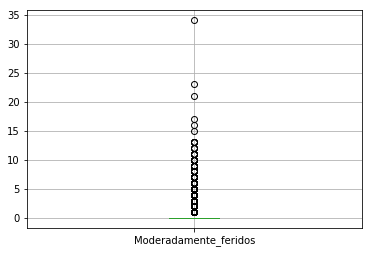

In [32]:
df_acidentes.boxplot(column='Moderadamente_feridos')

### Gravemente_feridos

Vítimas envolvidas em acidentes que saíram gravemente feridas

In [33]:
df_acidentes['Gravemente_feridos'] = df_acidentes['Gravemente_feridos'].fillna(0)
print(f"Média:\t\t{df_acidentes['Gravemente_feridos'].mean()}")
print(f"Mediana:\t{df_acidentes['Gravemente_feridos'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Gravemente_feridos'].std()}")

Média:		0.027773366859736404
Mediana:	0.0
Desvio Padrão:	0.20059644627861647


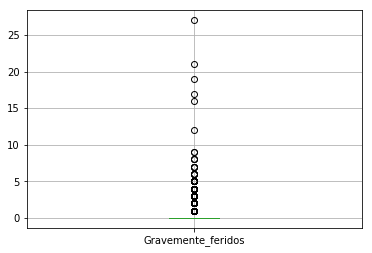

In [34]:
df_acidentes.boxplot(column='Gravemente_feridos')

### Mortos

Vítimas que morrerão em acidentes

In [35]:
df_acidentes['Mortos'] = df_acidentes['Mortos'].fillna(0)
print(f"Média:\t\t{df_acidentes['Mortos'].mean()}")
print(f"Mediana:\t{df_acidentes['Mortos'].median()}")
print(f"Desvio Padrão:\t{df_acidentes['Mortos'].std()}")

Média:		0.023729539978077308
Mediana:	0.0
Desvio Padrão:	0.18851245252333854


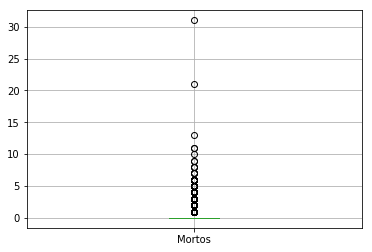

In [36]:
df_acidentes.boxplot(column='Mortos')

## 10 Tipo de Acidentes Mais Comum

In [37]:
acidentes_mais_comuns = df_acidentes['TipoDeAcidente'].value_counts().sort_values(ascending=False).head(10).index
for i in acidentes_mais_comuns:
    print(i)

Colisão Traseira
Saida de Pista
Colisão Lateral
Capotamento
Engavetamento
Choque - Defensa, barreira ou "submarino"
Queda de Moto
Colisão traseira
Tombamento
Choque - Objeto Fixo


## Visualização de Dados

### Histograma

#### Automóvel

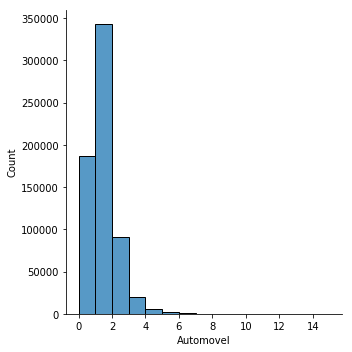

In [38]:
sns.displot(df_acidentes, x="Automovel", binwidth=1)

#### Bicicleta

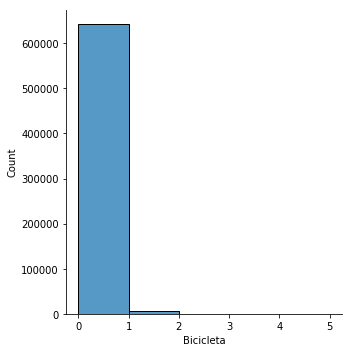

In [39]:
sns.displot(df_acidentes, x="Bicicleta", binwidth=1)

#### Caminhão

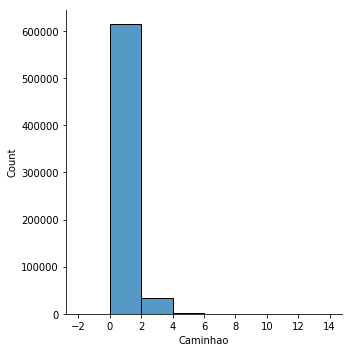

In [40]:
sns.displot(df_acidentes, x="Caminhao", binwidth=2)

#### Moto

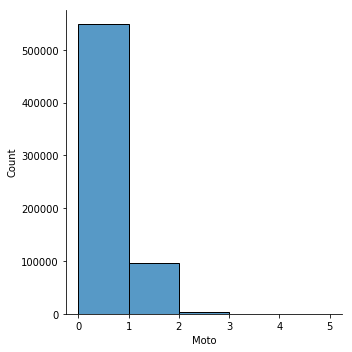

In [41]:
sns.displot(df_acidentes, x="Moto", binwidth=1)

#### Ônibus

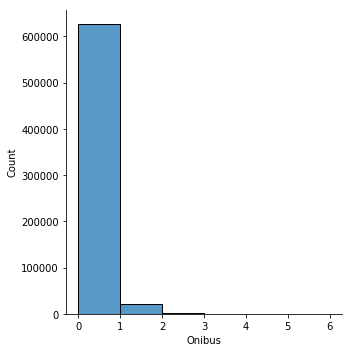

In [42]:
sns.displot(df_acidentes, x="Onibus", binwidth=1)

#### Tração Animal

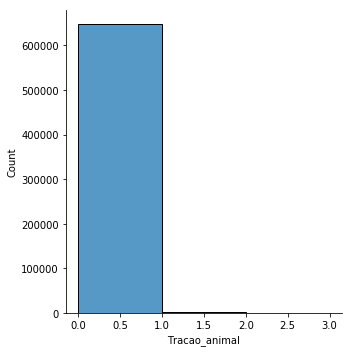

In [43]:
sns.displot(df_acidentes, x="Tracao_animal", binwidth=1)

#### Transporte de Cargas Especiais

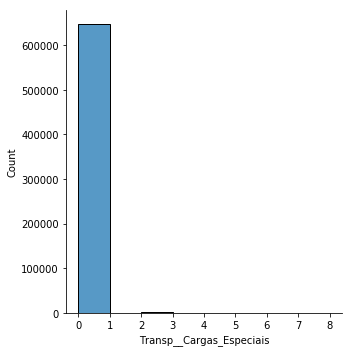

In [44]:
sns.displot(df_acidentes, x="Transp__Cargas_Especiais", binwidth=1)

#### Trator/Máquinas

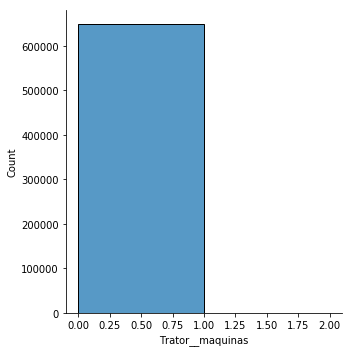

In [45]:
sns.displot(df_acidentes, x="Trator__maquinas", binwidth=1)

#### Utilitários

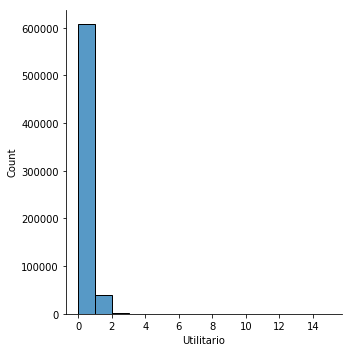

In [46]:
sns.displot(df_acidentes, x="Utilitario", binwidth=1)

#### Outros

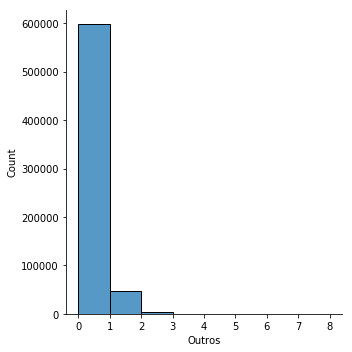

In [47]:
sns.displot(df_acidentes, x="Outros", binwidth=1)

#### Ilesos

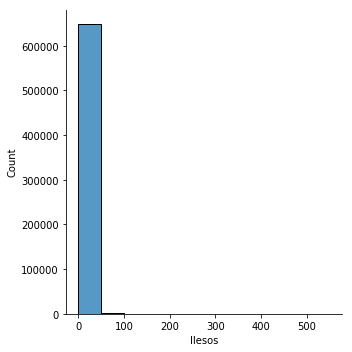

In [48]:
sns.displot(df_acidentes, x="Ilesos", binwidth=50)

#### Levemente Feridos

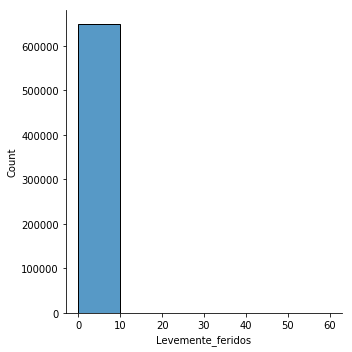

In [49]:
sns.displot(df_acidentes, x="Levemente_feridos", binwidth=10)

#### Moderadamente Feridos

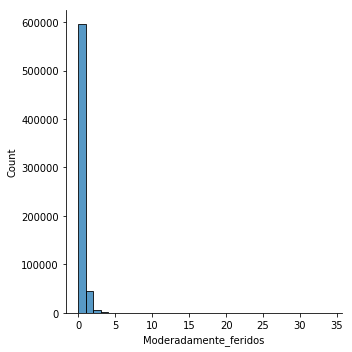

In [50]:
sns.displot(df_acidentes, x="Moderadamente_feridos", binwidth=1)

#### Gravemente Feridos

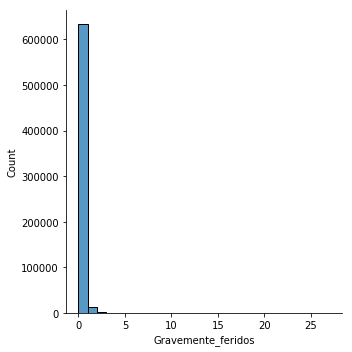

In [51]:
sns.displot(df_acidentes, x="Gravemente_feridos", binwidth=1)

#### Mortos

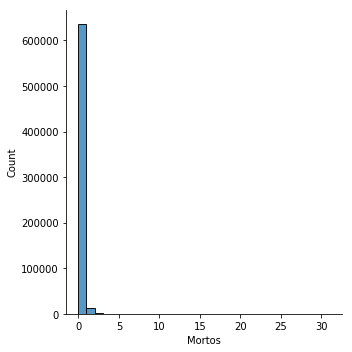

In [52]:
sns.displot(df_acidentes, x="Mortos", binwidth=1)

### Gráfico de Barras

#### Veículos envolvidos em acidentes

[Text(0, 0.5, 'Tipo de Véiculo'), Text(0.5, 0, 'Envolvidos em Acidentes')]

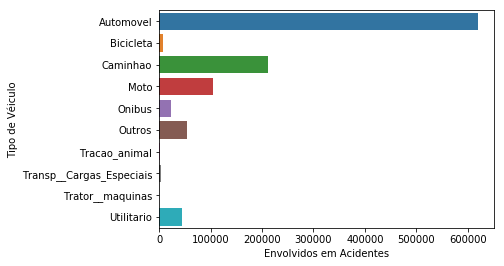

In [53]:
dados_veiculos = {"tipo_veiculo": [i for i in df_acidentes.columns[9:19]], 
        "qtd_envolvidos_acidentes": [df_acidentes[i].sum() for i in df_acidentes.columns[9:19]]}
graph_veiculos = sns.barplot(data=dados_veiculos, y="tipo_veiculo", x="qtd_envolvidos_acidentes")
graph_veiculos.set(xlabel="Envolvidos em Acidentes", ylabel="Tipo de Véiculo")

#### Ilesos, Levemente Feridos, Moderamente Feridos, Gravemente Feridos e Mortos em Acidentes

[Text(0, 0.5, 'Estado da Vítima'), Text(0.5, 0, 'Quantidade')]

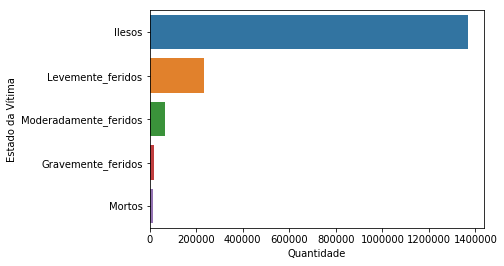

In [54]:
dados_vitimas = {"estado_fisico": [i for i in df_acidentes.columns[19:]], 
                 "quantidade": [df_acidentes[i].sum() for i in df_acidentes.columns[19:]]}
graph_vitimas = sns.barplot(data=dados_vitimas, y="estado_fisico", x="quantidade")
graph_vitimas.set(xlabel="Quantidade", ylabel="Estado da Vítima")

#### Acidentes por Trecho

[Text(0, 0.5, 'Número de Acidentes'), Text(0.5, 0, 'Trecho de Rodovia')]

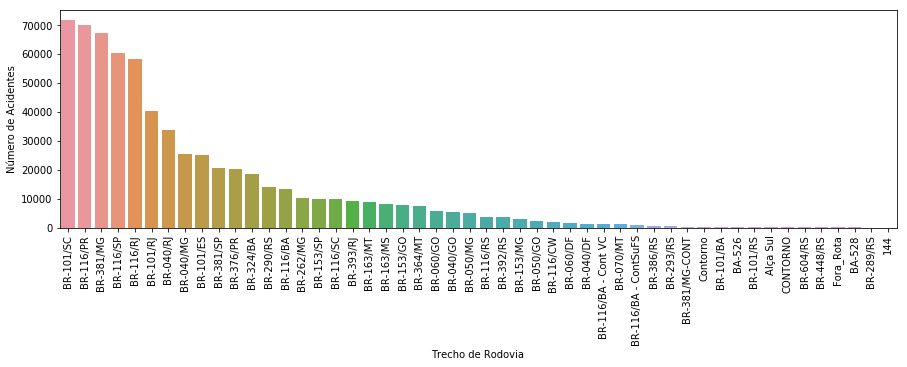

In [55]:
dados_trecho = {"trecho": df_acidentes["Trecho"].value_counts().index,
                "acidentes": [i for i in df_acidentes["Trecho"].value_counts()]}
fg, ax = plt.subplots(figsize=(15,4))
graph_trecho = sns.barplot(data=dados_trecho,x="trecho", y="acidentes", ax=ax)
plt.xticks(rotation=90)
graph_trecho.set(xlabel="Trecho de Rodovia", ylabel="Número de Acidentes")

#### Tipos de Acidentes Mais Frequentes nas Trechos de Rodovias Mais Perigosas

##### BR-101/SC

[Text(0, 0.5, 'Número de Acidentes'), Text(0.5, 0, 'Acidentes')]

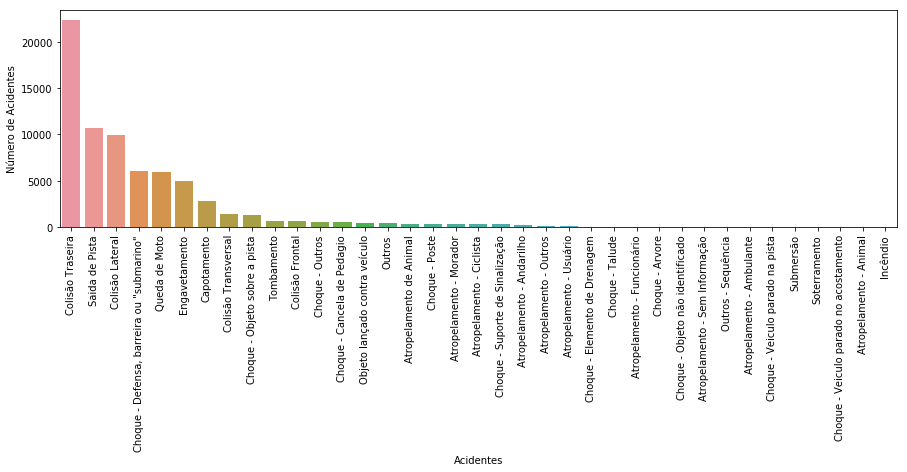

In [56]:
acidentes_br_101_sc = {"br_101_sc": df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-101/SC'), 
                                                      "TipoDeAcidente"].value_counts(),
                       "tipo_acidente": [i for i in df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-101/SC'), 
                                                      "TipoDeAcidente"].value_counts().index]}
fg, ax = plt.subplots(figsize=(15,4))
graph_br_101_sc = sns.barplot(data=acidentes_br_101_sc,y="br_101_sc", x="tipo_acidente", ax=ax)
plt.xticks(rotation=90)
graph_br_101_sc.set(xlabel="Acidentes", ylabel="Número de Acidentes")
#df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-101/SC'), "TipoDeAcidente"].value_counts()#.index
##df_acidentes['TipoDeAcidente'].value_counts()

##### BR-116/PR

[Text(0, 0.5, 'Número de Acidentes'), Text(0.5, 0, 'Acidentes')]

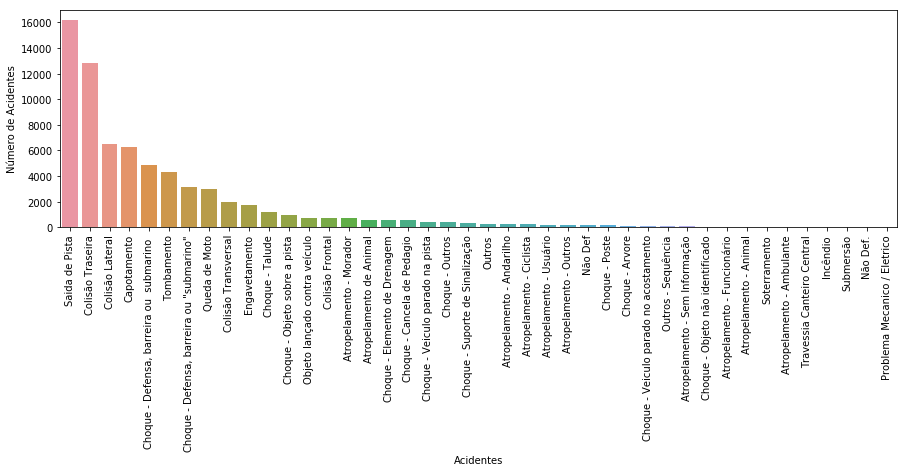

In [57]:
acidentes_br_116_pr = {"br_116_pr": df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/PR'), 
                                                      "TipoDeAcidente"].value_counts(),
                       "tipo_acidente": [i for i in df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/PR'), 
                                                      "TipoDeAcidente"].value_counts().index]}
fg, ax = plt.subplots(figsize=(15,4))
graph_br_116_pr = sns.barplot(data=acidentes_br_116_pr,y="br_116_pr", x="tipo_acidente", ax=ax)
plt.xticks(rotation=90)
graph_br_116_pr.set(xlabel="Acidentes", ylabel="Número de Acidentes")

##### BR-381/MG

[Text(0, 0.5, 'Número de Acidentes'), Text(0.5, 0, 'Acidentes')]

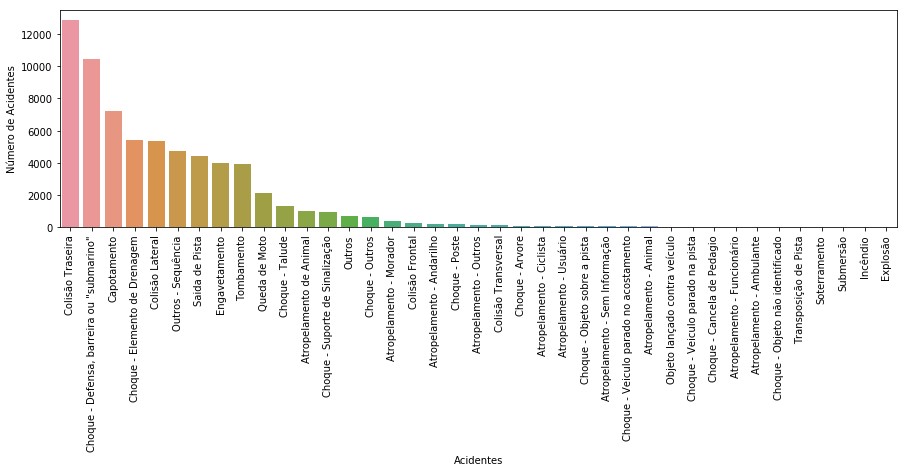

In [58]:
acidentes_br_381_mg = {"br_381_mg": df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-381/MG'), 
                                                      "TipoDeAcidente"].value_counts(),
                       "tipo_acidente": [i for i in df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-381/MG'), 
                                                      "TipoDeAcidente"].value_counts().index]}
fg, ax = plt.subplots(figsize=(15,4))
graph_br_381_mg = sns.barplot(data=acidentes_br_381_mg,y="br_381_mg", x="tipo_acidente", ax=ax)
plt.xticks(rotation=90)
graph_br_381_mg.set(xlabel="Acidentes", ylabel="Número de Acidentes")

##### BR-116-SP

[Text(0, 0.5, 'Número de Acidentes'), Text(0.5, 0, 'Acidentes')]

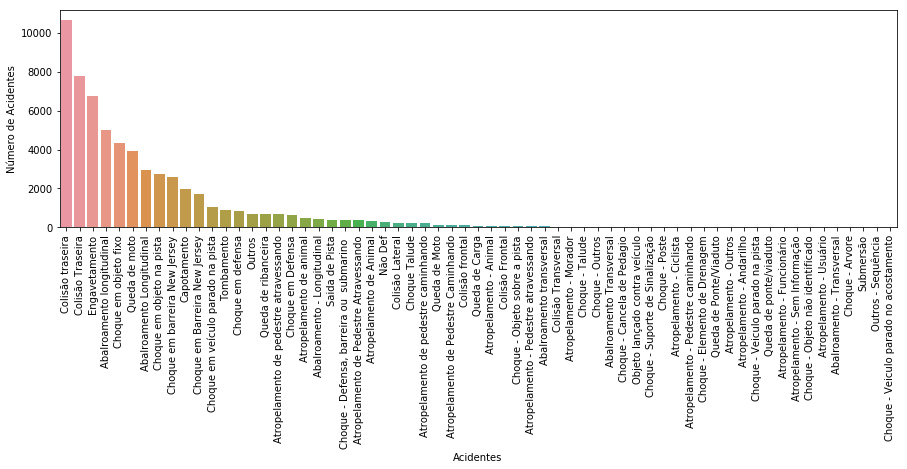

In [59]:
acidentes_br_116_sp = {"br_116_sp": df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/SP'), 
                                                      "TipoDeAcidente"].value_counts(),
                       "tipo_acidente": [i for i in df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/SP'), 
                                                      "TipoDeAcidente"].value_counts().index]}
fg, ax = plt.subplots(figsize=(15,4))
graph_br_116_sp = sns.barplot(data=acidentes_br_116_sp,y="br_116_sp", x="tipo_acidente", ax=ax)
plt.xticks(rotation=90)
graph_br_116_sp.set(xlabel="Acidentes", ylabel="Número de Acidentes")

#### BR-116-RJ

[Text(0, 0.5, 'Número de Acidentes'), Text(0.5, 0, 'Acidentes')]

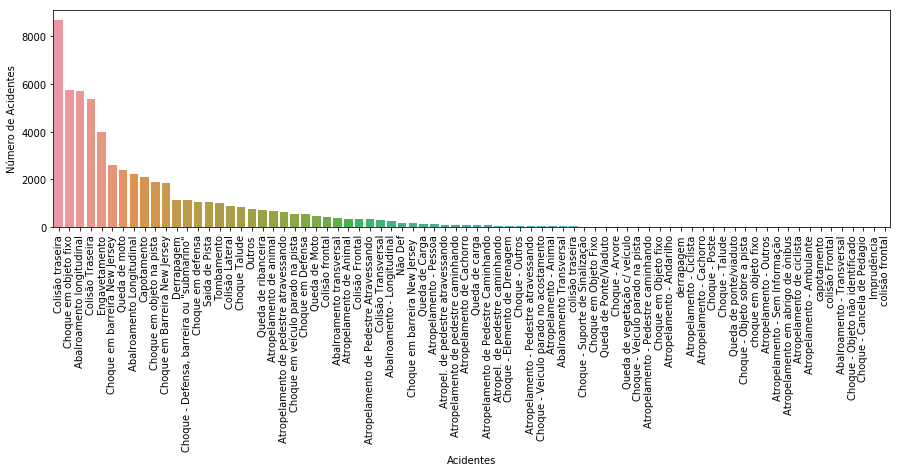

In [60]:
acidentes_br_116_rj = {"br_116_rj": df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/RJ'), 
                                                      "TipoDeAcidente"].value_counts(),
                       "tipo_acidente": [i for i in df_acidentes.loc[(df_acidentes['Trecho'] == 'BR-116/RJ'), 
                                                      "TipoDeAcidente"].value_counts().index]}
fg, ax = plt.subplots(figsize=(15,4))
graph_br_116_rj = sns.barplot(data=acidentes_br_116_rj,y="br_116_rj", x="tipo_acidente", ax=ax)
plt.xticks(rotation=90)
graph_br_116_rj.set(xlabel="Acidentes", ylabel="Número de Acidentes")

### Gráfico de Dispersão

Verificar se há alguma correlação entre os veículos envolvidos em acidentes

####  Automóvel

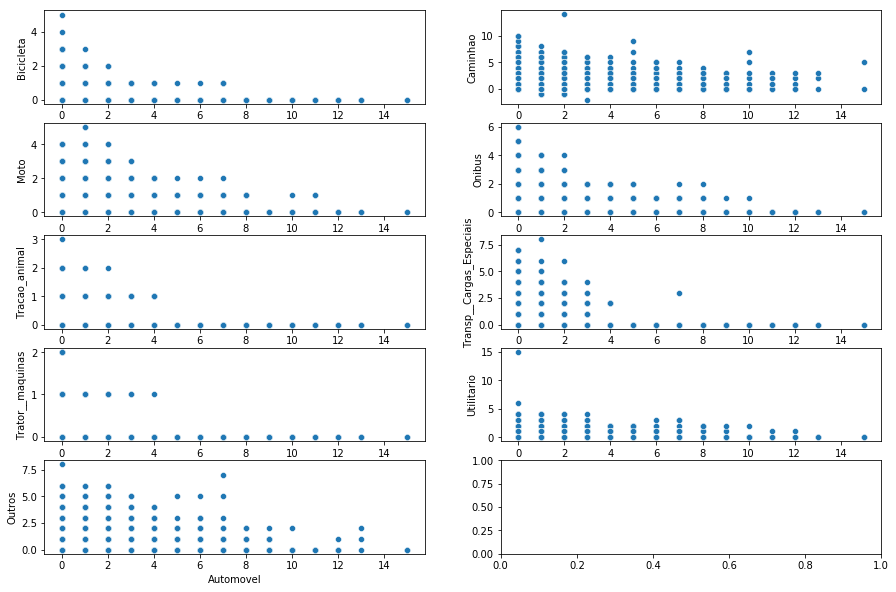

In [61]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,10))
sns.scatterplot(data=df_acidentes, x="Automovel", y="Bicicleta",ax=ax[0][0])
sns.scatterplot(data=df_acidentes, x="Automovel", y="Caminhao",ax=ax[0][1])
sns.scatterplot(data=df_acidentes, x="Automovel", y="Moto",ax=ax[1][0])
sns.scatterplot(data=df_acidentes, x="Automovel", y="Onibus",ax=ax[1][1])
sns.scatterplot(data=df_acidentes, x="Automovel", y="Tracao_animal",ax=ax[2][0])
sns.scatterplot(data=df_acidentes, x="Automovel", y="Transp__Cargas_Especiais",ax=ax[2][1])
sns.scatterplot(data=df_acidentes, x="Automovel", y="Trator__maquinas",ax=ax[3][0])
sns.scatterplot(data=df_acidentes, x="Automovel", y="Utilitario",ax=ax[3][1])
sns.scatterplot(data=df_acidentes, x="Automovel", y="Outros",ax=ax[4][0])

#### Bicicleta

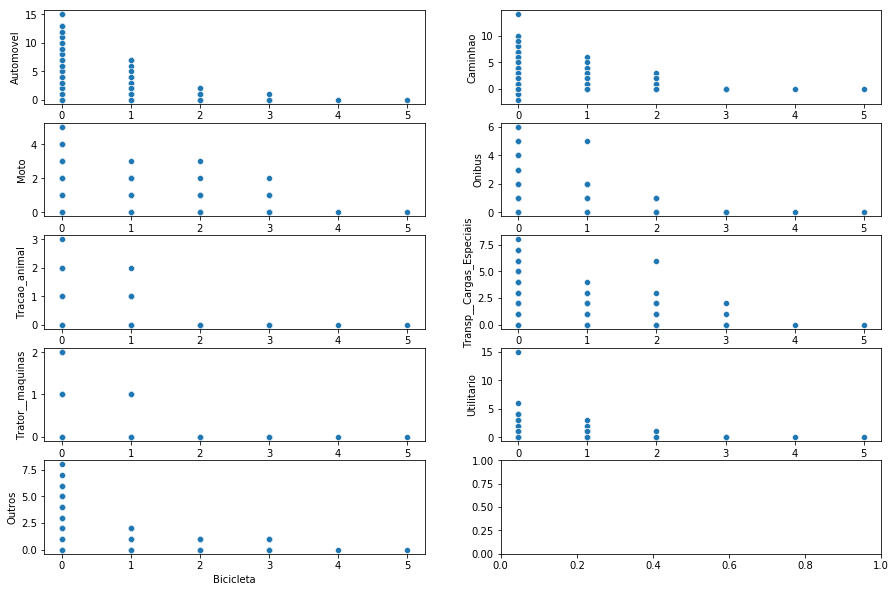

In [62]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,10))
sns.scatterplot(data=df_acidentes, x="Bicicleta", y="Automovel",ax=ax[0][0])
sns.scatterplot(data=df_acidentes, x="Bicicleta", y="Caminhao",ax=ax[0][1])
sns.scatterplot(data=df_acidentes, x="Bicicleta", y="Moto",ax=ax[1][0])
sns.scatterplot(data=df_acidentes, x="Bicicleta", y="Onibus",ax=ax[1][1])
sns.scatterplot(data=df_acidentes, x="Bicicleta", y="Tracao_animal",ax=ax[2][0])
sns.scatterplot(data=df_acidentes, x="Bicicleta", y="Transp__Cargas_Especiais",ax=ax[2][1])
sns.scatterplot(data=df_acidentes, x="Bicicleta", y="Trator__maquinas",ax=ax[3][0])
sns.scatterplot(data=df_acidentes, x="Bicicleta", y="Utilitario",ax=ax[3][1])
sns.scatterplot(data=df_acidentes, x="Bicicleta", y="Outros",ax=ax[4][0])

#### Caminhão

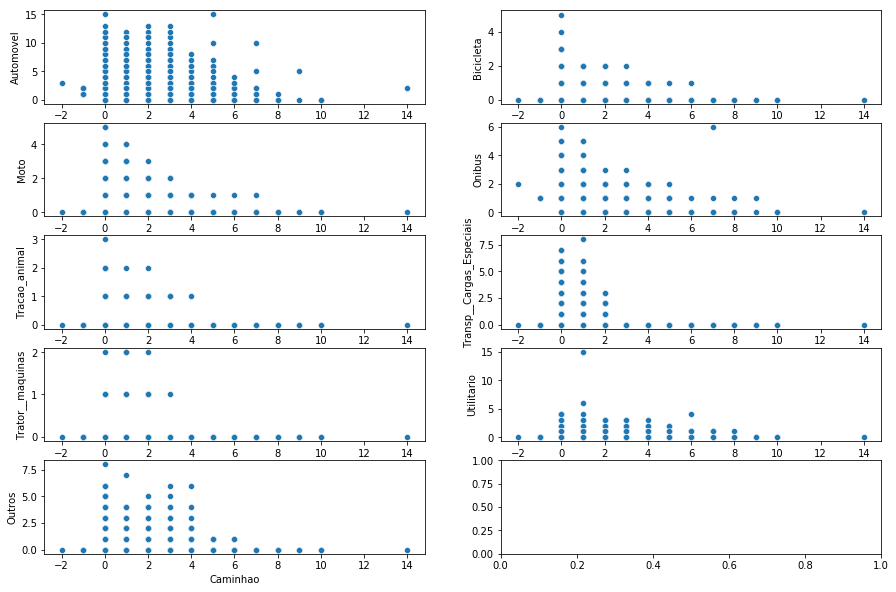

In [63]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,10))
sns.scatterplot(data=df_acidentes, x="Caminhao", y="Automovel",ax=ax[0][0])
sns.scatterplot(data=df_acidentes, x="Caminhao", y="Bicicleta",ax=ax[0][1])
sns.scatterplot(data=df_acidentes, x="Caminhao", y="Moto",ax=ax[1][0])
sns.scatterplot(data=df_acidentes, x="Caminhao", y="Onibus",ax=ax[1][1])
sns.scatterplot(data=df_acidentes, x="Caminhao", y="Tracao_animal",ax=ax[2][0])
sns.scatterplot(data=df_acidentes, x="Caminhao", y="Transp__Cargas_Especiais",ax=ax[2][1])
sns.scatterplot(data=df_acidentes, x="Caminhao", y="Trator__maquinas",ax=ax[3][0])
sns.scatterplot(data=df_acidentes, x="Caminhao", y="Utilitario",ax=ax[3][1])
sns.scatterplot(data=df_acidentes, x="Caminhao", y="Outros",ax=ax[4][0])

#### Moto

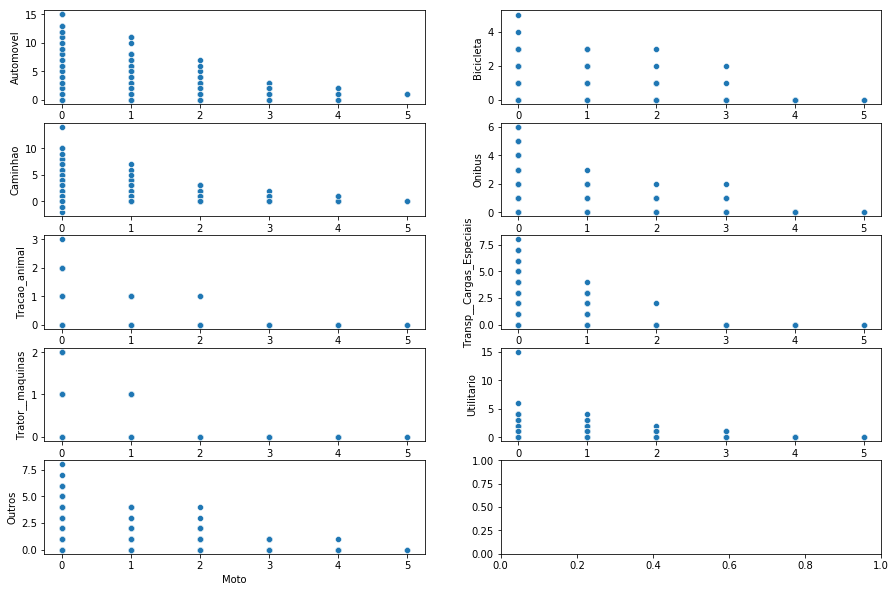

In [64]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,10))
sns.scatterplot(data=df_acidentes, x="Moto", y="Automovel",ax=ax[0][0])
sns.scatterplot(data=df_acidentes, x="Moto", y="Bicicleta",ax=ax[0][1])
sns.scatterplot(data=df_acidentes, x="Moto", y="Caminhao",ax=ax[1][0])
sns.scatterplot(data=df_acidentes, x="Moto", y="Onibus",ax=ax[1][1])
sns.scatterplot(data=df_acidentes, x="Moto", y="Tracao_animal",ax=ax[2][0])
sns.scatterplot(data=df_acidentes, x="Moto", y="Transp__Cargas_Especiais",ax=ax[2][1])
sns.scatterplot(data=df_acidentes, x="Moto", y="Trator__maquinas",ax=ax[3][0])
sns.scatterplot(data=df_acidentes, x="Moto", y="Utilitario",ax=ax[3][1])
sns.scatterplot(data=df_acidentes, x="Moto", y="Outros",ax=ax[4][0])

#### Ônibus

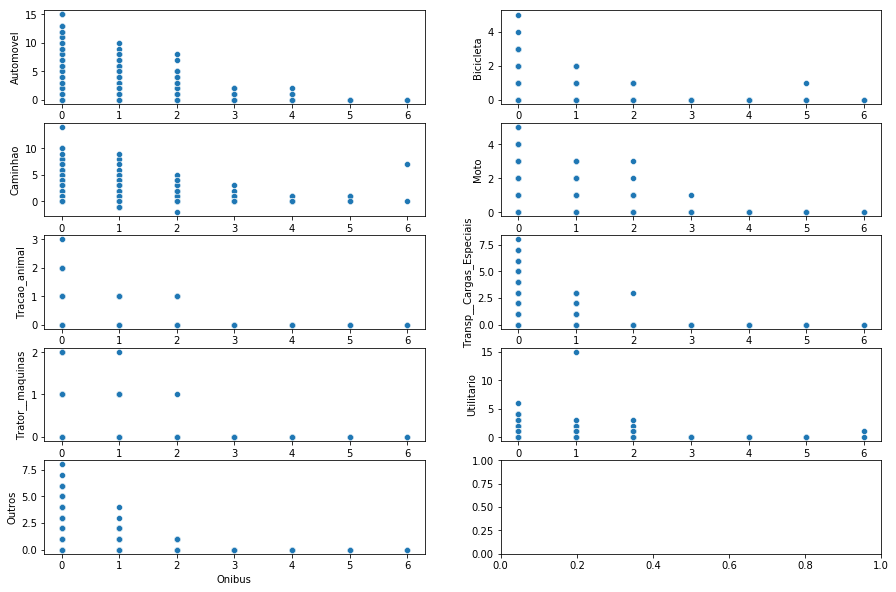

In [65]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,10))
sns.scatterplot(data=df_acidentes, x="Onibus", y="Automovel",ax=ax[0][0])
sns.scatterplot(data=df_acidentes, x="Onibus", y="Bicicleta",ax=ax[0][1])
sns.scatterplot(data=df_acidentes, x="Onibus", y="Caminhao",ax=ax[1][0])
sns.scatterplot(data=df_acidentes, x="Onibus", y="Moto",ax=ax[1][1])
sns.scatterplot(data=df_acidentes, x="Onibus", y="Tracao_animal",ax=ax[2][0])
sns.scatterplot(data=df_acidentes, x="Onibus", y="Transp__Cargas_Especiais",ax=ax[2][1])
sns.scatterplot(data=df_acidentes, x="Onibus", y="Trator__maquinas",ax=ax[3][0])
sns.scatterplot(data=df_acidentes, x="Onibus", y="Utilitario",ax=ax[3][1])
sns.scatterplot(data=df_acidentes, x="Onibus", y="Outros",ax=ax[4][0])

#### Tração Animal

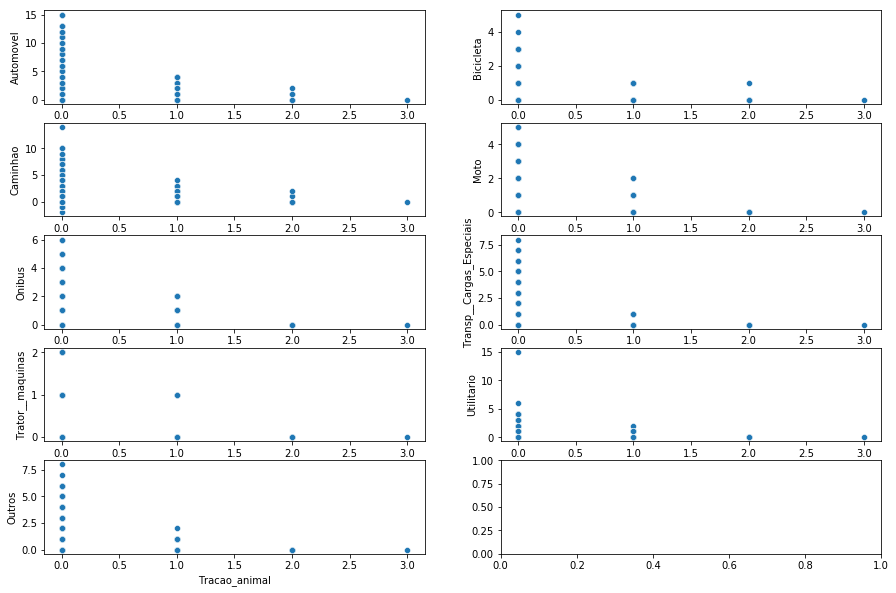

In [66]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,10))
sns.scatterplot(data=df_acidentes, x="Tracao_animal", y="Automovel",ax=ax[0][0])
sns.scatterplot(data=df_acidentes, x="Tracao_animal", y="Bicicleta",ax=ax[0][1])
sns.scatterplot(data=df_acidentes, x="Tracao_animal", y="Caminhao",ax=ax[1][0])
sns.scatterplot(data=df_acidentes, x="Tracao_animal", y="Moto",ax=ax[1][1])
sns.scatterplot(data=df_acidentes, x="Tracao_animal", y="Onibus",ax=ax[2][0])
sns.scatterplot(data=df_acidentes, x="Tracao_animal", y="Transp__Cargas_Especiais",ax=ax[2][1])
sns.scatterplot(data=df_acidentes, x="Tracao_animal", y="Trator__maquinas",ax=ax[3][0])
sns.scatterplot(data=df_acidentes, x="Tracao_animal", y="Utilitario",ax=ax[3][1])
sns.scatterplot(data=df_acidentes, x="Tracao_animal", y="Outros",ax=ax[4][0])

#### Transporte de Cargas Especiais

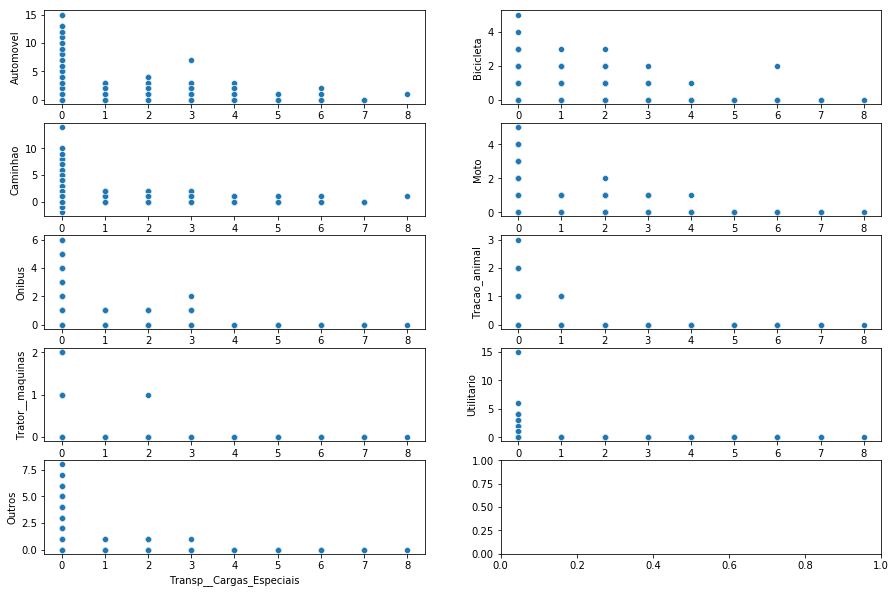

In [67]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,10))
sns.scatterplot(data=df_acidentes, x="Transp__Cargas_Especiais", y="Automovel",ax=ax[0][0])
sns.scatterplot(data=df_acidentes, x="Transp__Cargas_Especiais", y="Bicicleta",ax=ax[0][1])
sns.scatterplot(data=df_acidentes, x="Transp__Cargas_Especiais", y="Caminhao",ax=ax[1][0])
sns.scatterplot(data=df_acidentes, x="Transp__Cargas_Especiais", y="Moto",ax=ax[1][1])
sns.scatterplot(data=df_acidentes, x="Transp__Cargas_Especiais", y="Onibus",ax=ax[2][0])
sns.scatterplot(data=df_acidentes, x="Transp__Cargas_Especiais", y="Tracao_animal",ax=ax[2][1])
sns.scatterplot(data=df_acidentes, x="Transp__Cargas_Especiais", y="Trator__maquinas",ax=ax[3][0])
sns.scatterplot(data=df_acidentes, x="Transp__Cargas_Especiais", y="Utilitario",ax=ax[3][1])
sns.scatterplot(data=df_acidentes, x="Transp__Cargas_Especiais", y="Outros",ax=ax[4][0])

#### Trator/Máquinas

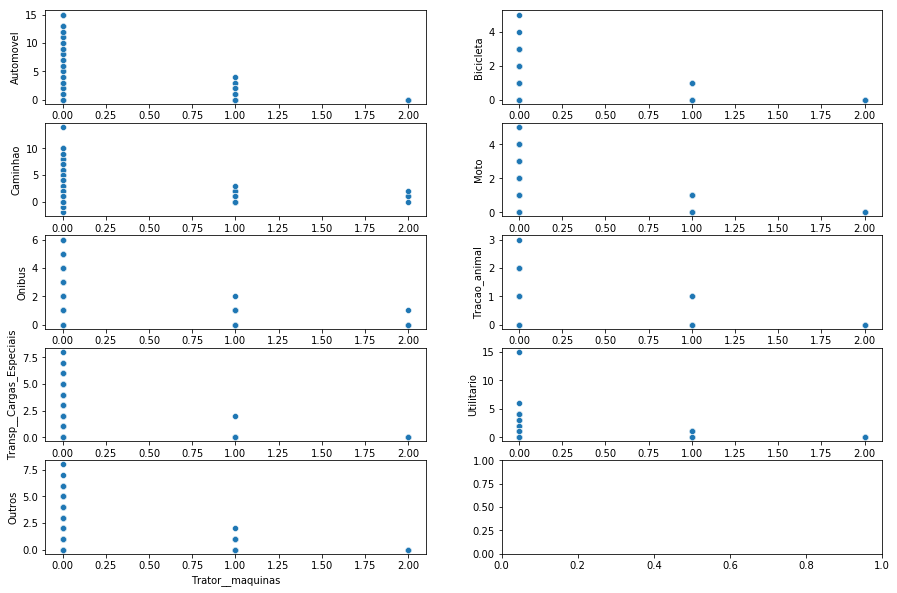

In [68]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,10))
sns.scatterplot(data=df_acidentes, x="Trator__maquinas", y="Automovel",ax=ax[0][0])
sns.scatterplot(data=df_acidentes, x="Trator__maquinas", y="Bicicleta",ax=ax[0][1])
sns.scatterplot(data=df_acidentes, x="Trator__maquinas", y="Caminhao",ax=ax[1][0])
sns.scatterplot(data=df_acidentes, x="Trator__maquinas", y="Moto",ax=ax[1][1])
sns.scatterplot(data=df_acidentes, x="Trator__maquinas", y="Onibus",ax=ax[2][0])
sns.scatterplot(data=df_acidentes, x="Trator__maquinas", y="Tracao_animal",ax=ax[2][1])
sns.scatterplot(data=df_acidentes, x="Trator__maquinas", y="Transp__Cargas_Especiais",ax=ax[3][0])
sns.scatterplot(data=df_acidentes, x="Trator__maquinas", y="Utilitario",ax=ax[3][1])
sns.scatterplot(data=df_acidentes, x="Trator__maquinas", y="Outros",ax=ax[4][0])

#### Utilitários

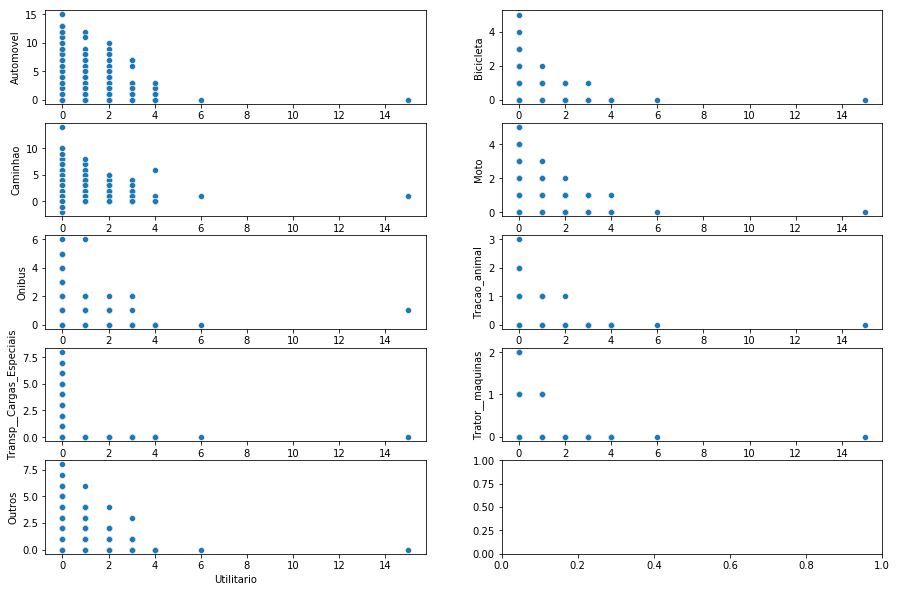

In [69]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,10))
sns.scatterplot(data=df_acidentes, x="Utilitario", y="Automovel",ax=ax[0][0])
sns.scatterplot(data=df_acidentes, x="Utilitario", y="Bicicleta",ax=ax[0][1])
sns.scatterplot(data=df_acidentes, x="Utilitario", y="Caminhao",ax=ax[1][0])
sns.scatterplot(data=df_acidentes, x="Utilitario", y="Moto",ax=ax[1][1])
sns.scatterplot(data=df_acidentes, x="Utilitario", y="Onibus",ax=ax[2][0])
sns.scatterplot(data=df_acidentes, x="Utilitario", y="Tracao_animal",ax=ax[2][1])
sns.scatterplot(data=df_acidentes, x="Utilitario", y="Transp__Cargas_Especiais",ax=ax[3][0])
sns.scatterplot(data=df_acidentes, x="Utilitario", y="Trator__maquinas",ax=ax[3][1])
sns.scatterplot(data=df_acidentes, x="Utilitario", y="Outros",ax=ax[4][0])

### Agrupamento

In [73]:
df_acidentes['Numero de Vitimas'] = (df_acidentes['Levemente_feridos'] 
                                     + df_acidentes['Moderadamente_feridos'] + df_acidentes['Gravemente_feridos'] 
                                     + df_acidentes['Mortos'])
df_acidentes['Numero de Veiculos Envolvidos'] = (df_acidentes['Automovel'] + df_acidentes['Bicicleta']
                                                 + df_acidentes['Caminhao'] + df_acidentes['Moto'] + df_acidentes['Onibus']
                                                 + df_acidentes['Outros'] + df_acidentes['Tracao_animal']
                                                 + df_acidentes['Transp__Cargas_Especiais']
                                                 + df_acidentes['Trator__maquinas'] + df_acidentes['Utilitario'])

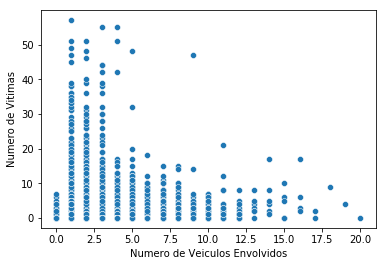

In [74]:
sns.scatterplot(data=df_acidentes, x="Numero de Veiculos Envolvidos", y="Numero de Vitimas")

In [75]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_acidentes[["Numero de Vitimas", "Numero de Veiculos Envolvidos"]])

KMeans(n_clusters=4)

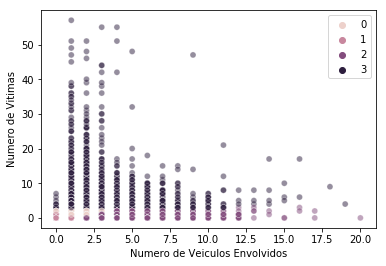

In [76]:
sns.scatterplot(data=df_acidentes, x="Numero de Veiculos Envolvidos", y="Numero de Vitimas", hue=kmeans.labels_, alpha=0.5)

In [77]:
df_acidentes['Data'] = pd.to_datetime(df_acidentes['Data'], format='%d/%m/%y') # colocar na parte de ajustes
df_resample = df_acidentes.resample('M', on='Data').sum()

In [78]:
pd.plotting.register_matplotlib_converters()
y = np.array(df_resample['Numero de Vitimas'].values, dtype=float)
x = np.array(pd.to_datetime(df_resample['Numero de Vitimas'].index.values), dtype=float)

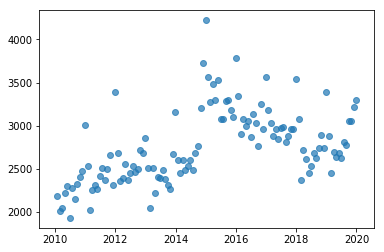

In [79]:
plt.scatter(df_resample.index, df_resample['Numero de Vitimas'].values, alpha=0.7)
plt.show()

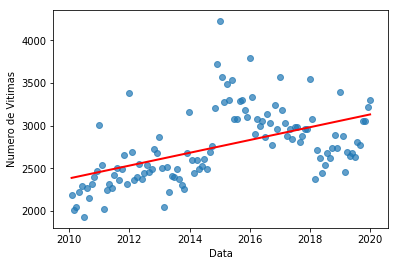

In [80]:
slope, intercept, r_value, p_value, std_err = linregress(x,y)
xf = np.linspace(min(x), max(x), 100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope * xf) + intercept
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf, color='r', linewidth=2)
plt.ylabel('Numero de Vitimas')
plt.xlabel('Data')
plt.scatter(df_resample.index, df_resample['Numero de Vitimas'], alpha=0.7)
#plt.style.use('seaborn-notebook')